# **Second Scenario: Encrypted-Traffic-Classification-with-Deep-Learning.**

# **SVM SCENARIO B**
Fecha: 21/05/2023

In [30]:
#Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate

In [31]:
# Upload data
url = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario2.csv'
df = pd.read_csv(url, low_memory=False)
y = df['label']
label_map = {'AUDIO': 0, 'BROWSING': 1, 'CHAT': 2, 'FILE-TRANSFER': 3, 'MAIL': 4, 'P2P': 5, 'VIDEO': 6, 'VOIP': 7}
change_labels = lambda x: label_map[x] if x in label_map else -1
y = df['label'].apply(change_labels)
X = df.iloc[:, 4:-1]

In [32]:
#Normalize
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:, feature_name] = pd.to_numeric(df.loc[:, feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:, feature_name] = (df.loc[:, feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:, feature_name] = (df.loc[:, feature_name] - min_value)    
    return df

X = dfNormalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [33]:
# Training an SVM model using sklearn's SVC with One-vs-One (OvO)

ovo_svm_linear = SVC(kernel='linear', C=0.1, random_state=42, decision_function_shape='ovo')
ovo_scores_linear = cross_validate(ovo_svm_linear, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])

ovo_svm_poly = SVC(kernel='poly', degree=3, C=0.1, random_state=42, decision_function_shape='ovo')
ovo_scores_poly = cross_validate(ovo_svm_poly, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])

ovo_svm_rbf = SVC(kernel='rbf', C=0.1, random_state=42, decision_function_shape='ovo')
ovo_scores_rbf = cross_validate(ovo_svm_rbf, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])

ovo_svm_sigmoid = SVC(kernel='sigmoid', C=0.1, random_state=42, decision_function_shape='ovo')
ovo_scores_sigmoid = cross_validate(ovo_svm_sigmoid, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])



# Scenario B KERNEL=LINEAR

In [34]:
# Print cross validation results with OvO - Kernel Linear

print('Resultados de validación cruzada con One-vs-One (OvO) - kernel linear:')
print('Accuracy: {:.2f}%'.format(ovo_scores_linear['test_accuracy'].mean() * 100))
print('Precision: {:.2f}%'.format(ovo_scores_linear['test_precision_micro'].mean() * 100))
print('Recall: {:.2f}%'.format(ovo_scores_linear['test_recall_micro'].mean() * 100))
print('F1-score: {:.2f}%'.format(ovo_scores_linear['test_f1_micro'].mean() * 100))

Resultados de validación cruzada con One-vs-One (OvO) - kernel linear:
Accuracy: 59.07%
Precision: 59.07%
Recall: 59.07%
F1-score: 59.07%


# Scenario B KERNEL=POLY

In [35]:
# Print cross validation results with OvO - Kernel Poly

print('Resultados de validación cruzada con One-vs-One (OvO) - kernel poly:')
print('Accuracy: {:.2f}%'.format(ovo_scores_poly['test_accuracy'].mean() * 100))
print('Precision: {:.2f}%'.format(ovo_scores_poly['test_precision_micro'].mean() * 100))
print('Recall: {:.2f}%'.format(ovo_scores_poly['test_recall_micro'].mean() * 100))
print('F1-score: {:.2f}%'.format(ovo_scores_poly['test_f1_micro'].mean() * 100))

Resultados de validación cruzada con One-vs-One (OvO) - kernel poly:
Accuracy: 34.44%
Precision: 34.44%
Recall: 34.44%
F1-score: 34.44%


# Scenario A KERNEL= SIGMOID

In [36]:
# Print cross validation results with OvO - Kernel Sigmoid

print('Resultados de validación cruzada con One-vs-One (OvO) - kernel sigmoid:')
print('Accuracy: {:.2f}%'.format(ovo_scores_sigmoid['test_accuracy'].mean() * 100))
print('Precision: {:.2f}%'.format(ovo_scores_sigmoid['test_precision_micro'].mean() * 100))
print('Recall: {:.2f}%'.format(ovo_scores_sigmoid['test_recall_micro'].mean() * 100))
print('F1-score: {:.2f}%'.format(ovo_scores_sigmoid['test_f1_micro'].mean() * 100))

Resultados de validación cruzada con One-vs-One (OvO) - kernel sigmoid:
Accuracy: 42.49%
Precision: 42.49%
Recall: 42.49%
F1-score: 42.49%


# Scenario A KERNEL= RBF

In [37]:
# Print cross validation results with OvO - Kernel Rbf

print('Resultados de validación cruzada con One-vs-One (OvO) - kernel rbf:')
print('Accuracy: {:.2f}%'.format(ovo_scores_rbf['test_accuracy'].mean() * 100))
print('Precision: {:.2f}%'.format(ovo_scores_rbf['test_precision_micro'].mean() * 100))
print('Recall: {:.2f}%'.format(ovo_scores_rbf['test_recall_micro'].mean() * 100))
print('F1-score: {:.2f}%'.format(ovo_scores_rbf['test_f1_micro'].mean() * 100))

Resultados de validación cruzada con One-vs-One (OvO) - kernel rbf:
Accuracy: 46.88%
Precision: 46.88%
Recall: 46.88%
F1-score: 46.88%


#**RANDOM FOREST**


Fecha: 21/05/2023

In [38]:
!pip install tensorflow-addons

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
# Load the data
url = 'https://raw.githubusercontent.com/micaelCZ/Encrypted-Traffic-Classification-with-Deep-Learning/main/dataset/pre_processedDataset/Scenario2.csv'
df = pd.read_csv(url,low_memory=False)
dataframe = pd.read_csv(url,low_memory=False, sep=',')
     

In [40]:
# Normalise the data
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df

In [41]:
# Split the data into train and test sets
y = df['label']
label_map = {'AUDIO': 0, 'BROWSING': 1, 'CHAT': 2, 'FILE-TRANSFER' : 3, 'MAIL' : 4, 'P2P' : 5, 'VIDEO' : 6, 'VOIP' : 7}
change_labels = lambda x: label_map[x] if x in label_map else -1
y = df['label'].apply(change_labels)

In [42]:
X = df.iloc[:, 4:-1]
X = dfNormalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# Define the parameter grid
param_grid = {
    
    'n_estimators': [85, 100, 115],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'max_features': ['auto', 'log2', 'sqrt'] 
}

In [44]:
# Instantiate the model and the grid search
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

In [45]:
# Fit the grid search to the data using cross-validation
grid_search.fit(X_train, y_train)
cv_scores = cross_val_score(grid_search, X_train, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [46]:
print(f"Cross validation scores: {cv_scores}")
print(f"Mean cross validation score: {np.mean(cv_scores)}")

Cross validation scores: [0.82595183 0.84071484 0.83139083 0.83993784 0.83061383]
Mean cross validation score: 0.8337218337218337


In [47]:
# Get the best model and evaluate its performance on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       144
           1       0.66      0.84      0.74       321
           2       0.53      0.28      0.36        65
           3       0.93      0.91      0.92       173
           4       0.78      0.38      0.51        56
           5       0.98      0.97      0.97       217
           6       0.77      0.71      0.74       175
           7       0.99      0.98      0.98       458

    accuracy                           0.84      1609
   macro avg       0.80      0.73      0.75      1609
weighted avg       0.85      0.84      0.84      1609



# CNN


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow_addons.metrics import F1Score

In [49]:
# Load the data
url = 'https://raw.githubusercontent.com/micaelCZ/Paper_Repositorio/main/dataset/datasetPreprocesado/Escenario2.csv'
df = pd.read_csv(url)
df = pd.read_csv(url,low_memory=False)
dataframe = pd.read_csv(url,low_memory=False)

In [50]:
# Normalise the data
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df

In [51]:
# Split the data into train and test sets
y = df['label']
label_map = {'AUDIO': 0, 'BROWSING': 1, 'CHAT': 2, 'FILE-TRANSFER' : 3, 'MAIL' : 4, 'P2P' : 5, 'VIDEO' : 6, 'VOIP' : 7}
change_labels = lambda x: label_map[x] if x in label_map else -1
y = df['label'].apply(change_labels)

In [52]:
X = df.iloc[:, 4:-1]
X = dfNormalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
# Reshape the data for Conv1D
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [54]:
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
def create_model(optimizer='adam', dropout_rate=0.5):
    model = keras.models.Sequential([
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        keras.layers.MaxPool1D(pool_size=2),
        keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
        keras.layers.MaxPool1D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(8, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', 
                  metrics=['accuracy', Precision(), Recall(), F1Score(num_classes=8, average='macro')])
    return model

In [56]:
# Create the KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)


<ipython-input-56-8d21fb633ffd>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [61]:
# Define the hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': [0.5, 0.6, 0.7, 0.8, 0.9],
    'epochs': [30, 40, 50]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe19102d6f0>,
             param_grid={'dropout_rate': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'epochs': [30, 40, 50], 'optimizer': ['adam', 'sgd']})

In [62]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_optimizer = best_params['optimizer']
best_dropout_rate = best_params['dropout_rate']
best_epochs = best_params['epochs']

In [63]:
# Create and fit the model with the best hyperparameters
best_model = create_model(optimizer=best_optimizer, dropout_rate=best_dropout_rate)
best_model.fit(X_train, y_train, epochs=best_epochs, batch_size=32, verbose=1, validation_split=0.1,
              callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
181/181 [==============================] - 5s 17ms/step - loss: 1.6220 - accuracy: 0.4091 - precision_91: 0.5462 - recall_91: 0.1216 - f1_score: 0.1801 - val_loss: 1.4395 - val_accuracy: 0.4519 - val_precision_91: 0.5867 - val_recall_91: 0.2733 - val_f1_score: 0.1502
Epoch 2/50
181/181 [==============================] - 3s 15ms/step - loss: 1.4381 - accuracy: 0.4592 - precision_91: 0.6122 - recall_91: 0.2129 - f1_score: 0.2151 - val_loss: 1.3790 - val_accuracy: 0.4907 - val_precision_91: 0.7778 - val_recall_91: 0.1630 - val_f1_score: 0.2348
Epoch 3/50
181/181 [==============================] - 2s 12ms/step - loss: 1.3461 - accuracy: 0.4982 - precision_91: 0.6714 - recall_91: 0.2753 - f1_score: 0.2730 - val_loss: 1.2767 - val_accuracy: 0.5233 - val_precision_91: 0.7710 - val_recall_91: 0.3137 - val_f1_score: 0.3071
Epoch 4/50
181/181 [==============================] - 2s 12ms/step - loss: 1.2404 - accuracy: 0.5483 - precision_91: 0.7370 - recall_91: 0.3276 - f1_score: 0.3475 

In [67]:
# Evaluate the model on test data
test_loss, test_acc, test_precision, test_recall, test_f1score = best_model.evaluate(X_test, y_test, verbose=0)
test_acc_percentage = test_acc * 100
test_precision_percentage = test_precision * 100
test_recall_percentage = test_recall * 100
test_f1score_percentage = test_f1score * 100

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc_percentage:.2f}%')
print(f'Test Precision: {test_precision_percentage:.2f}%')
print(f'Test Recall: {test_recall_percentage:.2f}%')
print(f'Test F1 Score: {test_f1score_percentage:.2f}%')


Test Loss: 0.6544
Test Accuracy: 76.38%
Test Precision: 83.94%
Test Recall: 68.24%
Test F1 Score: 60.04%


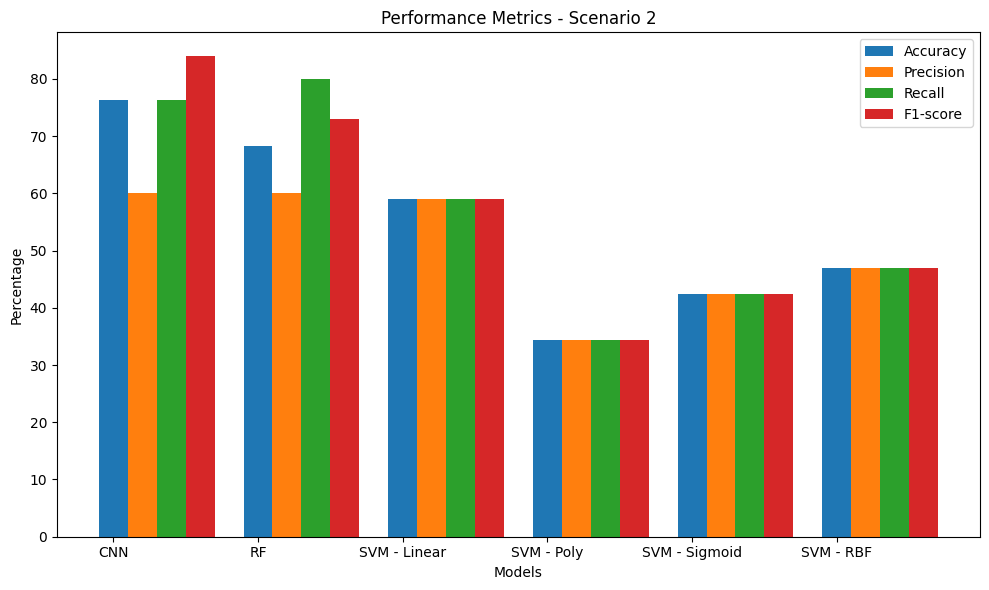

In [68]:
import matplotlib.pyplot as plt

models = ['CNN', 'RF', 'SVM - Linear', 'SVM - Poly', 'SVM - Sigmoid', 'SVM - RBF']
accuracy = [76.38, 68.24, 59.07, 34.44, 42.49, 46.88]
precision = [60.04, 60.04, 59.07, 34.44, 42.49, 46.88]
recall = [76.38, 80.00, 59.07, 34.44, 42.49, 46.88]
f1score = [83.94, 73.00, 59.07, 34.44, 42.49, 46.88]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, accuracy, width=0.2, align='center', label='Accuracy')
plt.bar([i + 0.2 for i in x], precision, width=0.2, align='center', label='Precision')
plt.bar([i + 0.4 for i in x], recall, width=0.2, align='center', label='Recall')
plt.bar([i + 0.6 for i in x], f1score, width=0.2, align='center', label='F1-score')

plt.xlabel('Models')
plt.ylabel('Percentage')
plt.title('Performance Metrics - Scenario 2')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()

plt.show()
